In [1]:
import pandas as pd
loc41= pd.read_csv('41-17.01.29-02.04.csv')
print(loc41)

     Unnamed: 0   Unnamed: 1                Unnamed: 2 Unnamed: 3  \
0           NaN          NaN                       NaN        NaN   
1           NaN     SITE NO:  41 - Mayfield Rd N/Bound        NaN   
2           NaN        Date:                  29/01/17        NaN   
3           NaN   Direction:                                  NaN   
4           NaN          NaN                       NaN        NaN   
5           NaN         Hour                       P/C    P/C Kph   
6           NaN  00.00-00.59                         0          0   
7           NaN  01.00-01.59                         0          0   
8           NaN  02.00-02.59                         0          0   
9           NaN  03.00-03.59                         0          0   
10          NaN  04.00-04.59                         0          0   
11          NaN  05.00-05.59                         0          0   
12          NaN  06.00-06.59                         0          0   
13          NaN  07.00-07.59      

In [2]:
loc41 = loc41.rename(columns={'Unnamed: 1': 'Hour', 'Unnamed: 2': 'P/C', 'Unnamed: 3': 'P/C Kph', 'DAILY FLOW BY HOUR': 'Ped', 'Unnamed: 5': 'Total'})
print('Bruntsfield Place S/Bound - DAILY FLOW BY HOUR')
loc41.drop(loc41.index[[0,1,2,3,4,5]], inplace=True)
loc41.drop(loc41.columns[[0,5]], axis=1, inplace=True)
loc41.index = loc41.index - 6
newcols = {
    'P/C': 'Bike Counts', 
    'P/C Kph': 'Bike Speed', 
    'Ped': 'Pedestrian Counts'
}
loc41.rename(columns=newcols, inplace=True)
loc41

Bruntsfield Place S/Bound - DAILY FLOW BY HOUR


,Hour,Bike Counts,Bike Speed,Pedestrian Counts
0,00.00-00.59,0,0,5
1,01.00-01.59,0,0,2
2,02.00-02.59,0,0,0
3,03.00-03.59,0,0,1
4,04.00-04.59,0,0,0
5,05.00-05.59,0,0,1
6,06.00-06.59,0,0,0
7,07.00-07.59,0,0,4
8,08.00-08.59,1,13,4
9,09.00-09.59,5,26,16


In [3]:
loc41['Hourstarts'] = loc41.Hour.str.split('-').str.get(0)
loc41['Hourends'] = loc41.Hour.str.split('-').str.get(1)
loc41.drop(loc41.columns[0], axis=1, inplace=True)

In [4]:
loc41.to_csv('Loc41.csv')
loc41 = loc41.dropna(how='all')
loc41 = loc41[loc41.Hourstarts != "Direction:"]
loc41 = loc41[loc41.Hourstarts != "Total"]
loc41 = loc41[loc41.Hourstarts != "Hour"]
loc41 = loc41[loc41.Hourstarts != "Date:"]

In [5]:
pd.options.mode.chained_assignment = None

In [6]:
loc41[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']] = loc41[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']].apply(pd.to_numeric)
#

In [7]:
loc41day1 = loc41.iloc[0:24]
loc41day2 = loc41.iloc[24:48]
loc41day3 = loc41.iloc[48:72]
loc41day4 = loc41.iloc[72:96]
loc41day5 = loc41.iloc[96:120]
loc41day6 = loc41.iloc[120:144]
loc41day7 = loc41.iloc[144:168]
#my data is divided into 7 clean sets

In [8]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

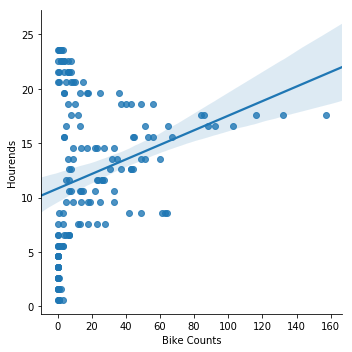

In [9]:
sns.lmplot(x='Bike Counts',y='Hourends',data=loc41)

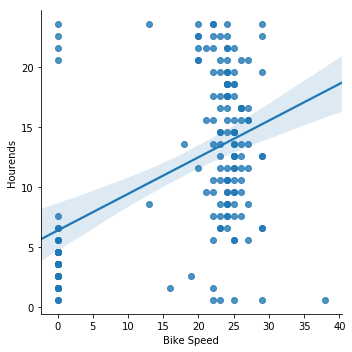

In [10]:
sns.lmplot(x='Bike Speed',y='Hourends',data=loc41)

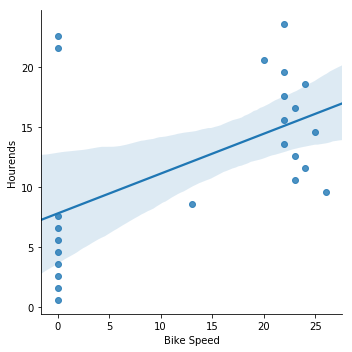

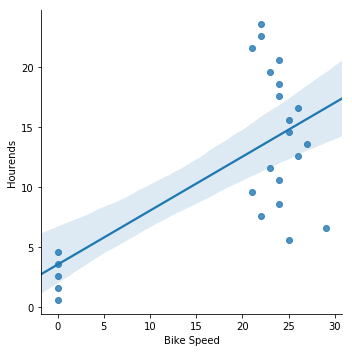

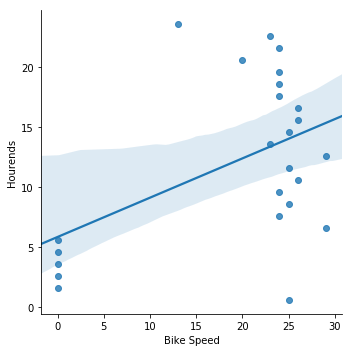

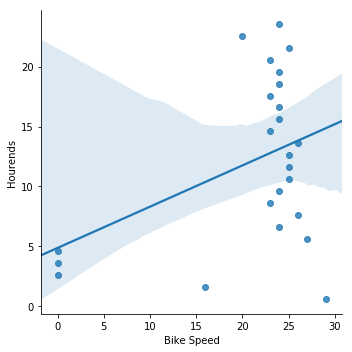

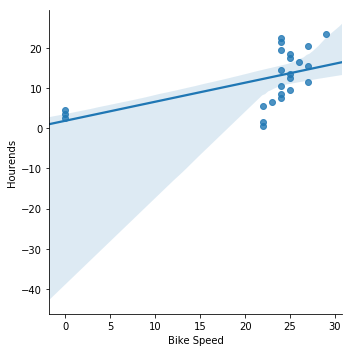

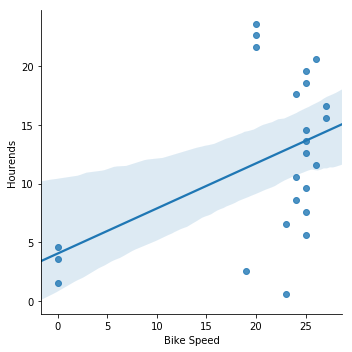

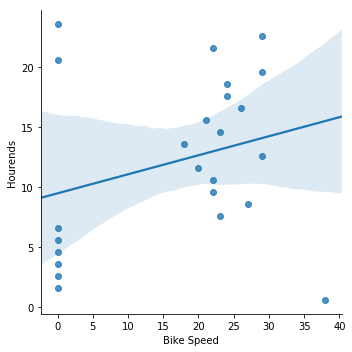

In [11]:
sns.lmplot(x='Bike Speed',y='Hourends',data=loc41day1)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc41day2)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc41day3)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc41day4)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc41day5)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc41day6)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc41day7)

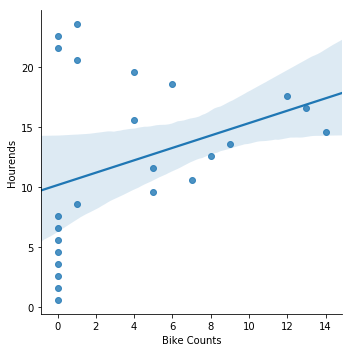

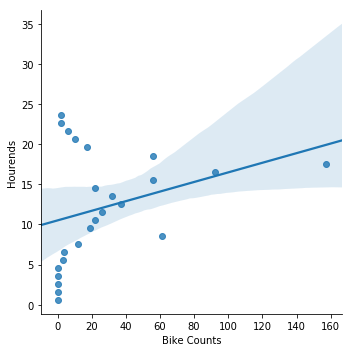

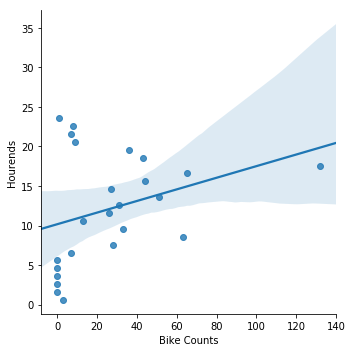

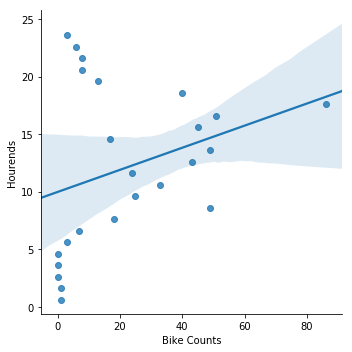

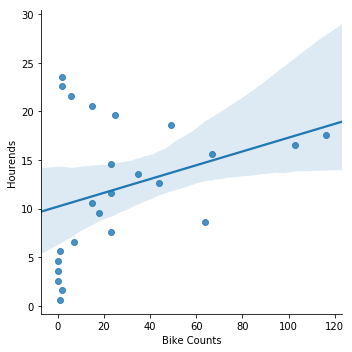

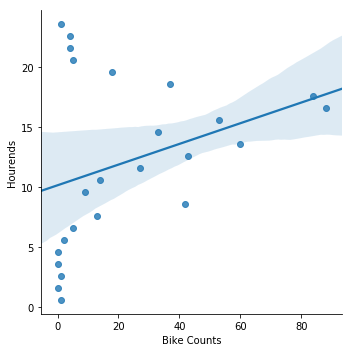

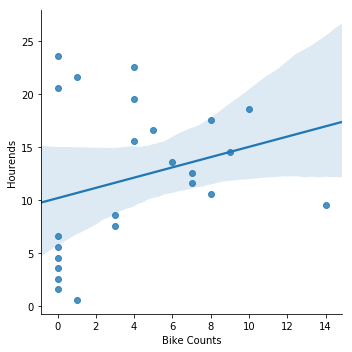

In [12]:
sns.lmplot(x='Bike Counts',y='Hourends',data=loc41day1)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc41day2)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc41day3)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc41day4)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc41day5)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc41day6)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc41day7)